<a href="https://colab.research.google.com/github/siddhartha18101/Covid-19/blob/master/PreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd /content/drive/My Drive/Corona/Validation

/content/drive/My Drive/Corona/Validation


In [0]:
!ls

cough.mp3  cough.wav


In [0]:
!pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp36-none-any.whl size=5887 sha256=d444b5c1be75ec728f71792b87e9c93fb525caceefb69c9e572d6c987a484815
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


In [0]:
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank
import librosa



In [0]:
rate, signal = wavfile.read('cough.wav')

In [0]:
signal


array([[  0,   0],
       [  0,   0],
       [  0,   0],
       ...,
       [-10, -10],
       [ -8,  -8],
       [ -9,  -9]], dtype=int16)

In [0]:
time = signal.shape[0]/rate


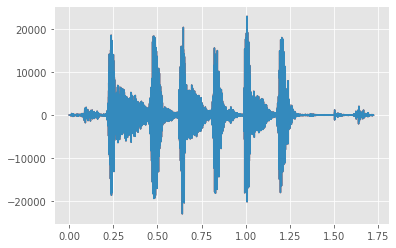

In [0]:
plt.style.use('ggplot')
T = 1/rate 
N = rate*abs(time) 
t_vec = np.arange(N)*T 
plt.plot(t_vec,signal)
plt.show()

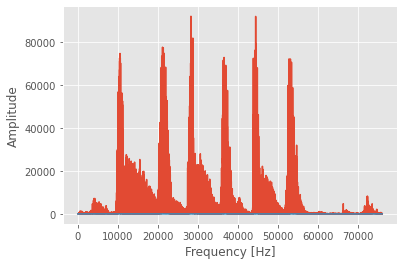

In [0]:
fft = np.fft.fft(signal)
fft[1:] = 2*fft[1:]
fft = np.abs(fft)

fig,ax = plt.subplots()
plt.plot(fft)
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')
plt.show()

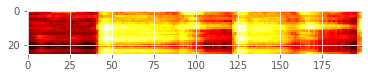

In [0]:
fbank = {}
mfccs = {}


bank = logfbank(signal[:rate], rate, nfilt=26, nfft=1103).T
mel = mfcc(signal[:rate], rate, numcep=13, nfilt=26, nfft=1103).T
mfccs = mel

fig, axes = plt.subplots()
axes.imshow(bank,cmap='hot', interpolation='nearest')



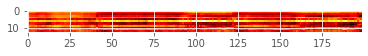

In [0]:
fig, axes = plt.subplots()
axes.imshow(mfccs,cmap='hot', interpolation='nearest')
plt.savefig('sneeze.png', format='png')